# Project 1 10108

A lot of the mathematics that manifests in our world is described in linear systems. Here we will study a class of such systems called "underdetermined". That is, a matrix system $Ax = y$ where $A$ is wide. In general, underdetermined have infinite solutions as there are more variables than constraints. We will look at two possible ways to extract an "ideal" $x$ from the system. Minimal norm solutions and Tikhonov regularisation.

We want to study such method to apply to some engineering problem. Relevant for use we will utilize our knowledge to "single channel source separation". Say multiple signals are read at the same points. A lot of information can be learned if one could separate the original messages. Also, if we were able to do so, we could save a lot of transmission data by stacking information. We will use our two above mentioned methods to isolate $1's$ and $0's$ from a single image stacked with both numbers.


In [1]:
import numpy as np
import scipy as sp
from scipy.linalg import solve_triangular
import matplotlib.pyplot as plt

**The minimal norm approach**

Given a matrix $A$ and an $y$ given, we want to find the "smallest" $x$ which satisfies $A$, that is

\begin{align}
    argmin_{x} \| x\|^2 \quad \text{such that  } Ax = y
\end{align}

In other words, find the $x$ with smallest norm that still satisfies the equation $Ax = y$.

Now this system is quite nice for multiple reasons. First I claim the hessian of the object function $\| x\|^2$ to be the $2I$. 

\begin{align}
    f(x) &= \|x\|^2 = x^T x \\
    \nabla f(x) &= 2 x \\
    \nabla ^2 f(x) &= 2I 
\end{align}

Note that the hessian is constant. Now, $2I$ is SPD (for all $x$) meaning that our object function is strictly convex. Also our constraints $Ax = y$ is linear and therefore convex. This is so-called "Convex optimization". In turns, this implies that if the system has an unique(!) solution if an solution exists. Keeping this in mind we will define an $x$ and construct $y = Ax$, making sure an soluion $x$ exists for our system.

**1a)**

To understand some conditions for our system we will review some basic properties of matrices. 

A linear system has no solutions if the linear constraints are overdetermined or if the constraints contradict eachother. Choosing the follow $A,y$ will give no solution.

\begin{equation}
A =
\begin{bmatrix}
    0 & 0 & 2 \\
    0 & 0 & 1 \\
\end{bmatrix}, \quad
y=\begin{bmatrix}
    1 \\
    1 \\
\end{bmatrix}
\end{equation}

Here our two constraints contradict, e.g $2x_3 = 1$ and $x_3 = 1$. However, it's quite "rare" to overdetmine a system with a wide matrix, but nevertheless possible, as showcased above. Dually one can underdetermine a system, making some variables free. Such systems will have infinitly many solutions. An example of such a system is given by:



\begin{equation}
A =
\begin{bmatrix}
    1 & 1 & 1 \\
    0 & 1 & 1 \\
\end{bmatrix}, \quad
y=\begin{bmatrix}
    2 \\
    1 \\
\end{bmatrix}
\end{equation}

As long as $x_1 = 1, \quad x_3 = 1 - x_2$. Here $x_2$ can have a random value.

**1b)**

let $A \in M_{m \times n} (\mathbb{R})$ where $m < n$.

A matrix $M$ is symmetric if $M^T = M$. 

Without proof, I claim $(AB)^T = B^T A^T$ and $(A^T)^T=A$ for any matrix

Finally $(A^TA)^T = A^T (A^T)^T = A^T A$ and $(AA^T)^T = (A^T)^TA^T = AA^T$ showing the symmetric property. 


Indeed they are positive semi-definite
\begin{align}
    x^TA^TAx &= (Ax)^T Ax = \langle Ax,Ax \rangle = \| Ax \|^2 \geq 0 \\
    x^TAA^Tx &=x^T(A^T)^TA^Tx = (A^T x)^T A^T x = \langle A^T x, A^T x \rangle = \|A^T x\|^2 \geq 0
\end{align}

where $x$ is suitable vector. 

Furthermore, I claim that $AA^T$ is invertible whilst $A^TA$ is not. 

By assumptions, the dimension of the row space is equal to $m$. Observe the matrix $A^T A$ to be an $n\times n$ matrix. By associativity of matrices we achive $(A^T A)x = A^T (Ax)$, which is an linear operator $A^T$ from the image of $A$ meaning $dim(im(A^TA)) \leq dim(im(A)) = m < n$, thus not invertible. 

Furthermore, by assumption the dimension of row and column space of $A$ is $m$ implying the row space of $A^T$ is $m$. Without justification I claim the range of $A^T$ and null space of $A$ to be orthogonal components. We want to show that the null space of $A A^T$ is trivial. Assume $A(A^T x) = A(y) = 0$. Since $y$ is in the nullspace of $A$ and in the range of $A^T$, it must be zero. $A^T x = 0$ (by orthogonal components). Now $A^T$ is an embedding $\mathbb{R}^m \hookrightarrow \mathbb{R}^n$ with a row space dimension equal to $m$ (since the rowspace is full), making $A^T$ invertible in its image concluding $x = 0$. 

$\square$

**1c)**

Since our first order necessary condtion for a system with constraint is given by KKT points. That is any possible minimizer must satisfy the KKT conditions. Since this is outside our curriculum (atleast so far) I won't go in great detail about them. However, a requirement is that $\nabla_x \mathcal{L}(x,\lambda) = 0$.

Define $A = (A_1, A_2, ..., A_m)^T$. $A_i$ will be the i-th row in $A$. Observe that $(Ax - y)_i = A_i x - y_i$. 

The lagrange function is given by 

$$
\mathcal{L}(x, \lambda) = x^T x + \lambda^T (A x - y)
$$

\begin{align}
     \left (\nabla_x \mathcal{L} (x, \lambda) \right )_j &= \partial_{x_j} \left (\sum_i x_i^2 + \sum_i \lambda_i (A_i x - y_i) \right )\\
    &= 2 x_j + \partial_{x_j} \sum_i \lambda_i (A_i x - y_i) \\
    &=2 x_j + \partial_{x_j} \sum_i \lambda_i \left( \sum_k A_{ik} x_k - y_i \right ) \\
    &=2 x_j + \sum_i \lambda_i \partial_{x_j} \left ( \sum_k  A_{ik} x_k \right )\\
    &=2 x_j + \sum_i \lambda_i A_{ij}\\
\end{align}

In other words

\begin{equation}
    \nabla_x \mathcal{L} (x, \lambda) = 2 x + A^T \lambda 
\end{equation}


Keep in mind that $\nabla_x \mathcal{L}(x,\lambda) = 0$ implies $x = -\frac{1}{2} A^T \lambda $

Food for thought: The hessian of the Lagrange will necessary be $ \nabla_{xx} \mathcal{L} = 2I$ which is positive definite. Therefore, $\omega^T \nabla_{xx} \mathcal{L} \omega > 0 \quad \forall \omega \in C, \omega \neq 0$ for any critical cone $C$. This is the second-order sufficient conditions, meaning any KKT points will indeed be an strict global minimizer. Therefore, the solution $x$ to $\nabla_x \mathcal{L}(x,\lambda) = 0$ is the minimizer $x_{min}$

Back to calculating the gradients. 

\begin{align}
    (\nabla_\lambda \mathcal{L} (x, \lambda))_j &= \partial_{\lambda_j} \left (\sum_i x_i^2 + \sum_i \lambda_i (A_i x - y_i)  \right )\\
    &= (A_j x - y_j)
\end{align}

In other words

\begin{equation}
    \nabla_{\lambda} \mathcal{L} (x, \lambda) = A x - y 
\end{equation}


Finally, our first order necessary condtion gives $\nabla_\lambda \mathcal{L}(x,\lambda) = 0$ and $\nabla_x \mathcal{L}(x,\lambda) = 0$. Now

\begin{equation}
    0 = A(0) = A(2 x_{min} + A^T \lambda_{min}) = 2 A x_{min} + A A^T \lambda_{min} = 2 y + A A^T \lambda_{min} \Rightarrow \lambda_{min} = -2(A A^T)^{-1} y
\end{equation}

Lastly we remember that $x = -\frac{1}{2} A^T \lambda $ yielding:

\begin{equation}
    x_{min} = -\frac{1}{2} A^T \lambda_{min} = -\frac{1}{2} A^T (-2(A A^T)^{-1} y) = A^T (A A^T)^{-1} y
\end{equation}



Just toverify that it is a solution. Indeed, 

\begin{equation}
    A(x_{min}) = A (A^T (A A^T)^{-1} y) = (AA^T) (A A^T)^{-1} y = y
\end{equation}

$\square$

Alot of the derivatives on this project have already been calculated in exercise 2. Above I have showed the component wise derivations. Define now the Gateaux derivative. 

\begin{equation}
    dF(x, e) = \left.\frac{d}{d\varepsilon} \right |_{\varepsilon=0} F(x + \varepsilon e)
\end{equation}

Where $e$ is a direction vector. 

From this point I will freely use the definition of Gateaux derivative to calculate derivatives of matrix systems. 

**1d)**

From 1c) we know $x_{min} = A^T (A A^T)^{-1} y$. Choosing the QR decomposition $A^T = QR$. $Q$ is here an ortogonal matrix, that is $Q^T = Q^{-1}$ and $R$ is upper triangular. We get

\begin{align}
    x_{min} &= A^T (A A^T)^{-1} y \\
    &= (QR) \left( (QR)^T (QR) \right)^{-1} y \\
    &= Q R \left ( R^T Q^{-1} Q R\right )^{-1} y\\
    &= Q R \left ( R^T R\right )^{-1} y\\
    &= Q R R^{-1} R^{-T} y\\
    &= Q R^{-T} y
\end{align}

$\square$

I will be using the usual Gram-Schmidt as I am quite familiar with it. Below is a code finding the $QR$-decomposition for a matrix. Keep in mind that this method requires a matrix to have a full column space, that is all columns are linear independent. When making an orthogonal vector from the Gram-Schmidt process, we are removing the projections from the other vectors. If the set is linear dependent, at least one such vector will vanish. My algorithm works only for "thin"/square matrices as any "thick" matrices cannot have a full column space.

By using Gram-Schmidt we can directly construct the truncated $Q$ and $R$, which is ideal to avoid saving redundant information.

In [2]:
def QR_factorization(A):
    B = np.copy(A)
    Q = np.empty(np.shape(A), dtype = float)
    R = np.zeros((len(A[0,:]), len(A[0,:])))
    
    for i in range(len(A[0,:])):
        qi = B[:,i]
        for j in range(i):
            qi -= Q[:,j] * np.inner(Q[:,j],A[:,i])
        qi = qi/(np.linalg.norm(qi))
        Q[:,i] = qi
    
    for i in range(len(R)):
        for j in range(i + 1):
            R[j, i] = np.inner(Q[:,j],A[:,i])
    return Q, R

In [3]:
A = np.array([[1,-4],[2,3],[2,2]], dtype = float)
Q, R = QR_factorization(A)
print(Q)
print(R)
print(Q @ R)

[[ 0.33333333 -0.93333333]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.13333333]]
[[3. 2.]
 [0. 5.]]
[[ 1. -4.]
 [ 2.  3.]
 [ 2.  2.]]


**1e)**

By the QR-decomposition we can easily calulate the answer by $x_{min} = Q R^{-T} y$ as derived above. However, calculating any inverse is quite demanding, especially for larger matrices. Luckily, we have some tricks up our sleeves. By taking the substitution $z = R^{-T}y$ we can rewrite:

\begin{align}
    x_{min} &= Q R^{-T}y = Qz\\
    \\
    z &= R^{-T} y \implies R^T z = y
\end{align}

Which gives a system of two equations where no inverse matrix are present. We first need to find our $z$. That can easily be done by forward substitution since $R^T$ is lower triangular. Also, our $Q$ is know so we just multiply from the left to find our minimizer. 

I have decided to use *scipy.linalg.solve_triangular* to solve the forward substitution so I'm certain the code runs smootly and quickly.

In [4]:
def find_x_min(Q, R, y):
    z = sp.linalg.solve_triangular(R.T, y, lower = True)
    return Q @ z

def QR_solver(A,y):
    Q, R = QR_factorization(A)
    return find_x_min(Q,R,y)

In [5]:
y = np.array([1,2])
print(QR_solver(A,y))

[-0.13777778  0.31111111  0.25777778]


In [6]:
A = np.array([[1,-4],[2,3],[2,2],[5,7]], dtype = float).T
x = np.array([1,0.5, 5, 5]).T

xm = QR_solver(A.T, A @ x)

print(QR_solver(A.T, A @ x))
print(np.linalg.norm(xm))
print(np.linalg.norm(x))


[1.47425335 2.13285273 2.20700309 5.369207  ]
6.357808598493451
7.158910531638177


**1f)**

We are asked to solve the system 

\begin{equation}
    AA^T z = y, \quad A^T z = x_{min}
\end{equation}

Which conveniently corresponds to

\begin{equation}
    x_{min} = A^T(AA^T)^{-1} y
\end{equation}

From our eariler tasks we have seen that the minimizer is then given by $x_{min} = QR^{-T}$

The two following code blocks are given in the handouts. The first generates a suitable matrix $A$ for our problem and the second generates an $y$

In [7]:
def generate_A(m,n):
    cov_eigvecs = np.random.uniform(-1.0,1.0,(n,n))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = sp.linalg.cholesky(corr, lower=True)
    
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(A,chol.T)
    return A

m = 1024 ###1024
n = 4048 ###4048
A = generate_A(m,n)

The alogrithm constructs an $x$ with entries from a normal distrubution around $0$.

In [8]:
N = 100
X = np.random.normal(0.0,1.0,(A.shape[1],N))
Y = np.dot(A,X)

print(X.shape)
print(Y.shape) 

(4048, 100)
(1024, 100)


Now we want to find the minimizers for different methods. First by the usual $np.linalg.solve()$, then by our $QR$ decomposition we just made. My code for the $QR$ decomposition is by no means optimal. Therefore, I have decided to include a code to check the $QR$ decomposition from the numpy library to keep things fair. Even though it's not mandatory, I have included it to showcase the potetial of the decomposition.

In [9]:
def QR_method(A, N, Y):
    Q, R = QR_factorization(A.T)
    for i in range(N):
        find_x_min(Q, R, Y[:,i])
        
def np_method(A, N, Y):
    AAT = np.dot(A, A.T)
    for i in range(N):
        z = np.linalg.solve(AAT,Y[:,i])
        x_sol = np.dot(A.T,z)

def npQR_method(A, N, Y):
    Q, R = np.linalg.qr(A.T)
    for i in range(N):
        find_x_min(Q, R, Y[:,i])

A quick check to see if the codes works as they should, that is find an $x_{min}$ which is a solution with lesser norm than $x_{true}$

In [10]:
Q, R = QR_factorization(A.T)
x1 = find_x_min(Q, R, Y[:,0])

print(np.linalg.norm(A @x1 - Y[:,0]))
print("The norm of xtrue and xmin respectivly: ", np.linalg.norm(X[:,0]), np.linalg.norm(x1))

2.9129868473966872e-12
The norm of xtrue and xmin respectivly:  64.16925010052752 32.128818248460284


Clearly $A x_{min} = y$ so our methods satisfy our constraint. Furthermore we see that the norm of $x_{min}$ is lower than the $x_{true}$

Also, I have only used one method for $x_{min}$. I will show later that the two methods approch the same $x_{min}$. 

Now we will time the methods to see what is quicker

In [11]:
%%timeit -r 10 -n 1
QR_method(A, N, Y)

1min 16s ± 1.16 s per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [12]:
%%timeit -r 10 -n 1
np_method(A, N, Y)

2.33 s ± 81.9 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


My implementation of the $QR$ decomposition was by far the slowest. Clearly it seems as if $np.linalg.solve()$ seems better altogether. However I would say the these times doesn't necessary show the advantages of the $QR$ decomposition. In our case, we only need to calculate the decomposition once, before using it on the $100$ different values of $y$. Now if we show time to for this single caluclation we get.

In [13]:
%%timeit -r 5 -n 1
QR_factorization(A.T)

1min 15s ± 896 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


The code is evidently using the majority of the time calculating the $Q$ and $R$, meaning the actual solving for $x$ happens instantly. It's been given that $N = 100$. For an enourmous $N$ we would clearly see the benefit of calculating $QR$ only once.

In [14]:
%%timeit -r 10 -n 1
npQR_method(A, N, Y)

624 ms ± 46.5 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


It is also worth pointing out that the numpy $QR$ is superior to $np.linalg.solve()$. This truly highlights the potetial of $QR$

Just to be certain, we want to verify our methods find the same minimal for $x$. Now the minimal value is unique so we expect no deviance. The code below finds the $x_{min}$ for my $QR$ method and the $np.linalg.solve()$ and plots the difference. 

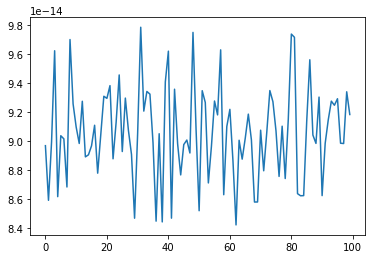

In [15]:
AAT = np.dot(A, A.T)
diff = np.zeros([N])
Q, R = QR_factorization(A.T)

for i in range(N):
    z = np.linalg.solve(AAT,Y[:,i])
    x_sol = np.dot(A.T,z)
    diff[i] = np.linalg.norm(find_x_min(Q, R, Y[:,i]) - x_sol)

plt.plot([i for i in range(N)], diff)
plt.show()

When the order of magnitude is aroud the range of the computer error we can conclude that they are as equal as they possibly can be, concluding the methods have no difference in numerical accuracy.

We also want some meassure of how much better the $x_{min}$ solution is.

In [16]:
print(np.linalg.norm(x1 - X[:,0]))

55.54666233376634


For some understaning, this number indicates our $x_{min}$ is actually quite far from the $x_{true}$ value. Now the point of the algorithm is not to actually reconstruct $x_{true}$. We want to find an $x$ which satisfy $Ax = y$ and has the lowest norm. From the nature of model constructing $x$, an educated guess for the $x_{min}$ could be around $0$. Seeing how the norm of difference $x_{min}-x_{true}$ are almost as big as the norm of $x_{true}$  demonstrating quite the improvement! 


In summary, we have found the solution $x_{min}$ which has the lowest norm-value. By constricution of the algorithm, namly the condition $\mathcal{L}(x,\lambda) = 0$ assures a minimizer, which we have also shown unique. I will say we have recovered a meaningful solution.

**Tikhonov regularisation**

We now want a different approach to solve $Ax = y$. We minimize the function

\begin{equation}
    \text{argmin}_x \|Ax - y\| + \mu \|x\|^2
\end{equation}

where $\mu$ is a postive parameter

Now we no longer have an equality constraint. Instead of constraining $Ax = y$, we rather have a tradeoff between how close $Ax $ should be $y$ and how small $\|x\|$ should be. Choosing $\mu$ small we can neglect $\mu \|x\|^2$ minimizing $\|Ax - y\|$. In other words, finding an solution to $Ax = y$. On the contrary, a larger $\mu$ will minimize $\mu \|x\|^2$ making sure the norm will vanish, but the $x$ we find might not be remotely close to a solution to $Ax = y$. Ideally, we want to find a sweet spot in the middle ground for the $\mu$ which gives both a small norm and (almost) a solution to $Ax = y$.

**2a)**

Assuming the usual inner product we can rewrite the norms into a vector representation.

\begin{equation}
    T(x) = \| Ax - y\|^2 + \mu \|x\|^2 = \langle Ax - y, Ax - y\rangle + \mu \langle x, x\rangle = x^T A^T A x - 2 x^T A^T y + y^T y + \mu x^T x
\end{equation}

Now by the definition of the Gateaux derivative one can easily derive that. Also We have shown a similar example in a previous exercise.

\begin{equation}
    \nabla_x T(x) = 2 A^T A x -2 A^T y + 2\mu x 
\end{equation}

It's given that $T(x_r) = 0$ meaning

\begin{align}
    0 &= 2 A^T A x_r - 2 A^T y + 2 \mu x_r \\
    &\implies (A^T A + \mu I) x_r =A^T y
\end{align}


Without proof I claim $(A + B)^T = A^T + B^T$. Since both $A^TA$ and $\mu I$ are symmetric, we easily see that their sum also is. 

\begin{equation}
    (A^T A +\mu I)^T = (A^T A)^T + mu I^T = (A^TA) + \mu I
\end{equation}

A $n \times n$ matrix $M$ is positive semi definite if $x^T Mx \geq 0$ for all $x$. In our case

\begin{equation}
    x^T A^T A x = \langle Ax, Ax\rangle = \|Ax\|^2 \geq 0
\end{equation}

proving $A^T A$ Positive semiefinite. Moreover, it can be shown that positive semi definite is equivalent to all eigenvalues being non-negative. Similarly one can show that positive definite is equivalent to strictly positive eigenvalues. 

Assume $\lambda_i$ to be the eigenvalues of $A^TA$. From the definition, the eigenvalues of our matrix of interest will be given by 

\begin{align}
    0 &= det((A^TA + \mu I) - \lambda^*_i I) \\
    &= det(A^TA - ( \lambda^*_i - \mu) I )
\end{align}

Since the last equation gives an expression for the eigenvalues of $A^TA$ we get. (If needed, reorder the eigenvalues of $A^TA + \mu I$ according to their corresponding eigenvalue $\lambda_i$)

\begin{equation}
    \lambda^*_i - \mu = \lambda_i \quad \forall i \Longrightarrow \lambda^*_i = \lambda_i + \mu \quad \forall i
\end{equation}

Now, by assumption $\mu > 0$ and by positive semi definiteness $\lambda_i$ are non-negative meaning $\lambda^*_i$ are strictly positive proving positive definitness and invertible. 

$\square$

Keep now in mind that $\nabla_x T(x) = 0$ is the first order necessary condition. We have just shown that:

\begin{equation}
    \nabla_x T(x) = 0 \implies(A^T A + \mu I) x_r =A^T y
\end{equation}

meaning any $x_r$ is a local minimizer. The hessian for this object function is given by

\begin{align}
    &\nabla_x T(x) = 2 A^T A x -2 A^T y + 2\mu x \\
    \implies &\nabla_{xx} T(x) = 2 (A^T A + \mu I)
\end{align}

Which only has positive eigenvalues and is symmetric or, in other words, SPD for all $x$, therefore convex, proving the minimizer $x_r$ unique.

**2b)**

It can be shown that SVD decomposition will always exists. Assume $A = U \Sigma V^*$, where $U$ and $V$ are unitary and $\Sigma$ is an diagonal (rectangular) matrix with the same shape as $A$. Since everything is real; complex conjugate is transpose. Rewriting our system gives

\begin{align}
    (A^T A + \mu I) x_r &= A^T y \\
    (V \Sigma^T U^T U \Sigma V^T + \mu I ) x_r &= V \Sigma^T U^T \\
    (V \Sigma^T \Sigma V^T + \mu V V^T ) x_r &= V \Sigma^T U^T \\
    (V \left(\Sigma^T \Sigma  + \mu I \right)V^T ) x_r &= V \Sigma^T U^T \\
    \left(\Sigma^T \Sigma  + \mu I \right)V^T  x_r &= \Sigma^T U^T \\
    V^T  x_r &= \left(\Sigma^T \Sigma  + \mu I \right)^{-1} \Sigma^T U^T \\
    x_r &= V\left(\Sigma^T \Sigma  + \mu I \right)^{-1} \Sigma^T U^T \\
    x_r &= VD U^T \\
\end{align}

Where we use result that $\Sigma^T \Sigma + \mu I$ is invertible and that $U$ and $V$ are unitary. Furthermore, any inverse of a diagonal matrix is diagonal and any product of diagonal matrices are diagonal, concluding  $D=\left(\Sigma^T \Sigma  + \mu I \right)^{-1} \Sigma^T$ diagonal (but rectangular).

It's worth noticing that even though we have an inverse present, no hard calculations are necessary. The inverse of any diagonal is a new diagonal matrix with their reciprocals. Let 

\begin{equation}
\Sigma =
\begin{bmatrix}
    \sigma_1       & 0 & 0 & 0&\dots & 0 \\
    0       & \sigma_2 & 0 & 0&\dots & 0 \\
    \vdots       & \vdots & \ddots &\vdots & \dots & \vdots \\
    0       & 0 & 0 &\sigma_m& \dots & 0 \\
\end{bmatrix}
\end{equation}

Then

\begin{equation}
\left(\Sigma^T \Sigma  + \mu I \right)^{-1} \Sigma ^T= 
\begin{bmatrix}
    \frac{\sigma_1}{\sigma_1^2 + \mu}       & 0 & \dots & 0 \\
    0       & \frac{\sigma_2}{\sigma_2^2 + \mu} & \dots & 0 \\
    \vdots       & \vdots & \ddots &\vdots \\
    0       & 0 & \dots &\frac{\sigma_m}{\sigma_m^2 + \mu} \\
    \vdots & \vdots & \vdots & \vdots \\
    0 & 0 & 0 & 0 \\
\end{bmatrix}
\end{equation}

**2c)**

The code below will utilize the above results to calculate the minimizer for the system, given a spesific $\mu$. 

To prevent storing redundant data, I have made the function take in some reduced $U,S,V^T$. This also makes it quicker. 

In [17]:
def Tikhonov_solveSVD(U, S, Vt, mu, y):
    return (Vt.T * (S/(S**2 + mu))) @ U.T @ y

**2d)**

Instead of varying for the $y$ we now want to vary the parameter $\mu$. As mentioned earlier, we want to scout for a $\mu$ which is not too small or large, if it exists. Our matrix $A$ will still be constant. 

The call below initializes an $x_{true}$ and an $y$.

In [18]:
x = np.random.normal(0.0,1.0,(A.shape[1]))
y = np.dot(A,x)

Below are two function which find $x_r$ using $SVD$ and the usual $np.linalg.solve()$ respectivly. 

In [19]:
def Tikhonov1(A, y, N, a, b):
    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    mu = np.logspace(a,b, N) 
    Xr = np.empty((len(A[0]), N))
    for i in range(N):
        Xr[:,i] = Tikhonov_solveSVD(U,S,Vt,mu[i], y)
    return Xr

def Tikhonov2(A,y,N, a, b):
    ATA = A.T @ A
    B = A.T @ y
    mu = np.logspace(a,b, N)
    Xr = np.empty((len(A[0]), N))
    for i in range(N):
        Xr[:,i] = np.linalg.solve(ATA + mu[i] * np.eye(len(ATA)),B)
    return Xr

Now we want to see them in action!

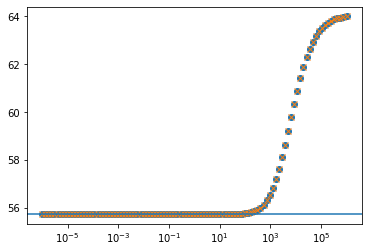

In [20]:
N = 100

a = 6
b = -6

XR1 = Tikhonov1(A, y, N, a, b)
XR2 = Tikhonov2(A, y, N, a, b)

l1 = np.empty(N)
l2 = np.empty(N)


for i in range(N):
    l1[i] = np.linalg.norm(XR1[:,i] - x)
    l2[i] = np.linalg.norm(XR2[:,i] - x)
    
mu = np.logspace(6,-6, N)

Q, R = QR_factorization(A.T)
xmin = find_x_min(Q, R, y)

plt.plot(mu, l1, 'o')
plt.plot(mu, l2, 'x')
plt.axhline(y = np.linalg.norm(xmin - x))
plt.xscale("log")
plt.show()

One can see how both methods give identical answers, which is expected of course since they solve the same equation. 

In constrast to the minimal norm approach, further away from $x_{true}$ isn't necessary ideal. As earlier mentioned, larger values for $\mu$ will ignore the term$\|Ax-y\|$, searching for an $x$ which is not necessary a solution to $Ax = y$. I would say when $\mu$ has reached $10$, the curve already takes off. higher values of $\mu$ doesn't give a good solution to $Ax = y$. 

Finally, we can see that small values of $\mu$ gives the same solution what the minimal norm approch. It is nice to see that different methods achive the same answer.

To further study the system we will plot $\|A(x_r(\mu)) - y\|$ for a smaller interval of $\mu$. I will also print the value of $\mu$ which gives the $x_r(\mu)$ closest to $x_{true}$.

4.328761281083062e-05
72


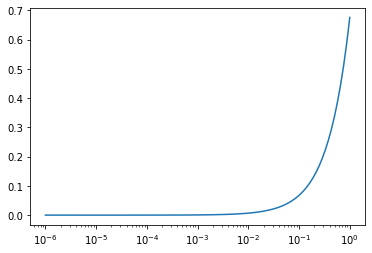

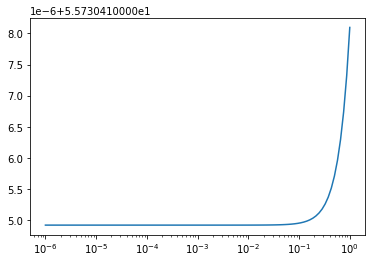

In [21]:
N = 100
a = 0
b = -6
l3 = np.zeros(N)
l4 = np.zeros(N)


XR1 = Tikhonov1(A, y, N, a, b)
mu = np.logspace(a,b, N)

for i in range(len(mu)):
    l3[i] = np.linalg.norm(A @ XR1[:,i] - y)
    l4[i] = np.linalg.norm(XR1[:,i] - x)
    
print(mu[np.argmin(l4)])
print(np.argmin(l4))

plt.plot(mu, l3)
plt.xscale("log")
plt.show()

plt.plot(mu, l4)
plt.xscale("log")
plt.show()

Now we can see the best $\mu$ is almost as small as possible. Looking at how the variables are defined one can argue it makes sense. Since $y$ is defined as $Ax_{true}$ we most certainly want $\|Ax - y\|$ to vanish since $\|Ax_{true} - y\| = 0$ by construction. Choosing a mini $\mu$ will focus on exactly that term. This might be an unfair system for Tikhonov regularisation :(

I will, maybe semi-unreasonable, state that $10^{-3}$ is a good enough value for $\mu$. I will use this value in a upcoming occasion.

In [22]:
%%timeit -r 5 -n 1
Tikhonov1(A, y, 100, 6, -6)

14.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [23]:
%%timeit -r 5 -n 1
Tikhonov2(A, y, 100, 6, -6)

1min 17s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


From the timings above, one observe that the usual $np.linalg.solve()$ is more demanding. As earlier, this change comes from the fact that we only have to calculate the $SVD$ decomposition once.

As we saw earlier, the answear was identical to what was found using the minimal norm approach. In both this timings and in 1) we used varied a parameter with $100$ different values. Compared to numpy's $QR$ these are very slow. 

In [24]:
%%timeit -r 5 -n 1
U, S, Vt = np.linalg.svd(A)

2.97 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In constrast to the $QR$ from $1f)$ we see that using the $SVD$ matrices actually takes time. The majority of the time us used using $U, \Sigma, V$. For larger and larger $N$, $QR$ would be a better choice.

Lastly, if we want to zoom in all the way and compare the two methods.

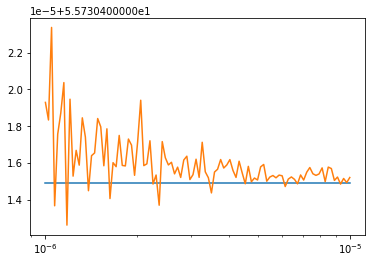

In [25]:
N = 100
a = -5
b = -6


XR1 = Tikhonov1(A, y, N, a, b)
XR2 = Tikhonov2(A, y, N, a, b)

l5 = np.empty(N)
l6 = np.empty(N)

for i in range(N):
    l5[i] = np.linalg.norm(XR1[:,i] - x)
    l6[i] = np.linalg.norm(XR2[:,i] - x)
    
mu = np.logspace(a,b, N)

plt.plot(mu, l5)
plt.plot(mu, l6)
plt.xscale("log")
plt.show()

We see that both methods have almost the same value (differs with order of magnitude $10^-{7}$. We see that $np.linalg.solve()$ is somewhat unstable compared to the $SVD$ which is completely constant.

**Single Channel Source Separation**

Now we will try to apply our methods to single channel source seperation. We will inspect pictures consisting of both $0$ and $1$. We will do so by projecting the combine image to two differet subspaces $Z_0, Z_1$. The $Z_0$ represent an subspace of all the basis vectors needed to represent a "written $0$", similar for $Z_1$. Miraculously we have been given a pairwise orthogonal basis for the subspaces. Now we want to project the image of interest onto these $Z_i$. It is given that the projection is given by $P_{Z_i}(y) = W_i W_i^T y$ where $W_i$ is the matrix is the basis vectors as columns. 

Ideally we want the projections to be orthogonal, that is every fragment of the pictures either contribute to either the $0$ or the $1$. For orthogonal projections, any elements are sent to its unique closest point in the respective subspace. Now, $Z_0$ and $Z_1$ are not necessary orthogonal, so we will rather minimize $\| y - W_i W_i^T y \|$. Call the projection onto $Z_0$ and $Z_1$ for $u,v$ respectivly. Since our image of interest is only a combination of $0$ and $1$ we still want the projections to add up to the original point ($u + v = y$). It can be shown that the system becomes. 

\begin{equation}
    \text{argmin}_x x^T B x \quad \quad Ax = y
\end{equation}

Where $B = \begin{bmatrix}
    B_0 & 0\\
    0 & B_1
    \end{bmatrix}, \quad A = \begin{bmatrix}
    I & I\\
    \end{bmatrix}, \quad x = \begin{bmatrix}
    u \\
    v
    \end{bmatrix}$ 


**3a)**

It is given that $W \in \mathbb{R}^{n \times d}$ with $d < n$ and that the columns are pairwise orthogonal. Therefore I claim $W$ must have $W^T$ as a left(!) inverse. 

By assumption the columns in $W$ are pairwise orthogonal. Denote $W = (w_1, w_2, ..., w_d)$ Then 

\begin{equation}
    W^T W = \begin{bmatrix}
    \langle w_1, w_1\rangle & \dots & \langle w_1, w_d\rangle\\
    \vdots      & \ddots & \vdots \\
    \langle w_d, w_1\rangle & \dots & \langle w_d, w_d\rangle
    \end{bmatrix}
\end{equation}

Now, from the pairwise orthogonal property, $\langle w_i, w_j\rangle = \delta_{ij} \quad \forall i, j$ (where $\delta_{ij}$ is the Kroneckers Delta function).  All entries not on the diagonal be $\delta_{ij}, i \neq j$, or in other words, equal to zero. Along the diagonal we will have 1's, giving the identity matrix. Using $W^T W = I$ we obatin:

\begin{align}
    B &= I - W W^T \\
    B^2 &= (I - W W^T)^2 = I^2 - 2 I W W^T + W W^T W W^T \\
    &= I^2 - 2 I W W^T + W (W^T W) W^T \\
    &= I - W W^T \\
    &= B
\end{align}

It's trivial to see that $B$ is symmetric

\begin{equation}
    (I-WW^T)^T = I^T - (W^T)^TW^T = I - WW^T
\end{equation}

Assume now $P$ to be a projection. Then $P^2 = P$. Now from the definition of eigenvalue. Choose $x$ to be a any eigenvector and $\lambda$ the corresponding eigenvalue.

\begin{align}
    Px &= \lambda x \\
    P^2 x &= P(\lambda x) = \lambda^2 x\\
    \Rightarrow \lambda^2 &= \lambda \\
    \lambda (\lambda - 1) &= 0
\end{align}

Now since $\mathbb{R}$ is an integral domain we conclude $\lambda = 0$ or $\lambda = 1$ to be the only possible eigenvalues of a projection.

Finally, since $B$ is a projection, implying all eigenvalues non-negative, and symmetric, $B$ is symmetric positive semidefinite. 

$\square$

**3b)**

The lagrange of the function is

\begin{equation}
    \mathcal{L}(x,\lambda) = \frac{1}{2} x^T B x + \lambda ^T (Ax - y)
\end{equation}

I will freely use Gateaux derivative. The gradients $\nabla_x \mathcal{L}$ and $\nabla_\lambda \mathcal{L}$ will then be given by

\begin{align}
    \nabla_x \mathcal{L} (x,\lambda) &= \frac{1}{2} \left(B + B^T\right) x + A^T \lambda \\
    \nabla_\lambda \mathcal{L} (x,\lambda) &= A x - y \\
\end{align}

The conditions $\nabla_x \mathcal{L} (x,\lambda) = 0, \nabla_\lambda \mathcal{L} (x,\lambda) = 0$ gives the two equations

\begin{align}
    \frac{1}{2} \left(B + B^T\right) x + A^T \lambda &= 0\\
    A x - y &= 0\\
    \\
    \frac{1}{2} \left(B + B^T\right) x + A^T \lambda &= 0\\
    A x + 0 \lambda &= y\\
    \\
    \begin{bmatrix}
    \frac{1}{2}(B^T + B) & A^T \\
    A      & 0
    \end{bmatrix}
    \begin{bmatrix}
    x\\
    \lambda
    \end{bmatrix}
    &= 
    \begin{bmatrix}
    0\\
    y
    \end{bmatrix}
\end{align}
also in our example, $B = B^T \Rightarrow \frac{1}{2} \left ( B^T + B\right) = B$
The whole equation is just a system of bloack matrices. From the definition of the $A,B, x$ we can write out

\begin{align}
    A &= \begin{bmatrix}
    I & I
    \end{bmatrix} \\
    B &= \begin{bmatrix}
    B_0 & 0\\
    0 & B_1
    \end{bmatrix} \\
    x &= \begin{bmatrix}
    u\\
    v
    \end{bmatrix} \\
    \\
    \begin{bmatrix}
    \frac{1}{2}(B^T + B) & A^T \\
    A      & 0
    \end{bmatrix} &=
    \begin{bmatrix}
    B_0 & 0 & I\\
    0      & B_1 & I \\
    I & I & 0
    \end{bmatrix}\\
    &= \begin{bmatrix}
    I - W_0W_0^T & 0 & I\\
    0      & I - W_1 W_1^T & I \\
    I & I & 0
    \end{bmatrix} \\
    \\
    \begin{bmatrix}
    x\\
    \lambda
    \end{bmatrix}
    &=
    \begin{bmatrix}
    u\\
    v\\
    \lambda
    \end{bmatrix}
\end{align}

Finally our system boils down to

\begin{equation}
    \begin{bmatrix}
    I - W_0W_0^T & 0 & I\\
    0      & I - W_1 W_1^T & I \\
    I & I & 0
    \end{bmatrix}
    \begin{bmatrix}
    u\\
    v\\
    \lambda
    \end{bmatrix} = \begin{bmatrix}
    0\\
    0\\
    y
    \end{bmatrix}
\end{equation}

Now this is a system of three matrix equations. 

From the first and second equation we eliminate $\lambda$ then using the thirs we substituting $u + v = y$:
\begin{align}
    (I - W_0 W_0^T) u + \lambda &= 0 \\
    (I - W_1 W_1^T) v + \lambda &= 0 \\
    \\
    \Rightarrow (I - W_0 W_0^T) u - (I - W_1 W_1^T) v &= 0 \\
    (I - W_0 W_0^T) u - (I - W_1 W_1^T) (y - u) &= 0 \\
    (I - W_0 W_0^T) u + (I - W_1 W_1^T) u &= (I - W_1 W_1^T)y \\
    \left(2I - W_0 W_0^T - W_1 W_1^T \right) u &= (I - W_1 W_1^T)y \\
\end{align}

Using $C = \left(2I - W_0 W_0^T - W_1 W_1^T \right)$ and $d = (I - W_1 W_1^T) y$ we get

\begin{equation}
    Cu = d \quad v = y - u
\end{equation}

**3c)**

From the object function $f(x) = \| Ax - y\|^2 + \mu \|Bx\|^2$. We use the Gateaux derivative to calculate the gradient and set it equal zero. 

\begin{align}
    \nabla f(x) &= \nabla (x^T A^T A x - 2 x^T A^T y + y^T y + \mu x^T B^T B x) \\
    &= 2 A^T A x - 2 A^T y + 2 \mu B x \\
    \Rightarrow A^T y &= A^T A x + \mu B x
\end{align}

Which is essentially identical to what we did in the previous 2


\begin{align}
    A &= \begin{bmatrix}
    I & I
    \end{bmatrix} \\
    B &= \begin{bmatrix}
    B_0 & 0\\
    0 & B_1
    \end{bmatrix} \\
    x &= \begin{bmatrix}
    u\\
    v
    \end{bmatrix} \\
    \\
\end{align}

This gives

\begin{align}
    A^T A x + \mu B x &= A^T y \\
    \left (
    \begin{bmatrix}
    I \\
    I
    \end{bmatrix}
    \begin{bmatrix}
    I & I
    \end{bmatrix}
    + \mu
    \begin{bmatrix}
    B_0 & 0 \\
    0 & B_1
    \end{bmatrix}
    \right)
    \begin{bmatrix}
    u \\
    v
    \end{bmatrix}
    &= \begin{bmatrix}
    I \\
    I
    \end{bmatrix}
    y \\
    \left (
    \begin{bmatrix}
    I & I\\
    I & I
    \end{bmatrix}
    + \mu
    \begin{bmatrix}
    B_0 & 0 \\
    0 & B_1
    \end{bmatrix}
    \right)
    \begin{bmatrix}
    u \\
    v
    \end{bmatrix}
    &= \begin{bmatrix}
    I \\
    I
    \end{bmatrix}
    y \\
    \begin{bmatrix}
    I + \mu B_0& I\\
    I & I + \mu B_1
    \end{bmatrix}
    \begin{bmatrix}
    u \\
    v
    \end{bmatrix}
    &= \begin{bmatrix}
    y \\
    y
    \end{bmatrix} \\
    \begin{bmatrix}
    I + \mu (I - W_0 W_0^T)& I\\
    I & I + \mu (I - W_1 W_1^T)
    \end{bmatrix}
    \begin{bmatrix}
    u \\
    v
    \end{bmatrix}
    &= \begin{bmatrix}
    y \\
    y
    \end{bmatrix} \\
\end{align}

Writing out the system gives two matrix equations

\begin{align}
    &u + \mu (I - W_0 W_0^T) u + v = y \\
    &u + v +\mu (I - W_1 W_1^T) v = y \\
    \\
    &\mu (I - W_0 W_0^T) u + u= y  - v \\
    &\mu (I - W_1 W_1^T) v + v= y - u
\end{align}
For convenience, I will now use $B_0$ and $B_1$.

\begin{align}
    &u + \mu B_0 u + v = y \\
    &u + v +\mu B_1 v = y \\
    \\
    &B_0u = \frac{1}{\mu} (y - u -v) \\
    &B_1v = \frac{1}{\mu} (y - u -v) \\
    \\
    \Rightarrow &B_0 u= B_1 v 
\end{align}
Multiplying the first equation by $B_1$ (from the left) and substituting:
\begin{align}
    B_1 (u + \mu B_0 u + v) &= B_1 y \\
    B_1 u + \mu B_1 B_0 u + B_1v &= B_1 y \\
    B_1 u + \mu B_1 B_0 u + B_0 u &= B_1 y \\
    \left ( B_1 + \mu B_1 B_0 + B_0 \right ) u &= B_1 y \\
\end{align}
Dually, one can show

\begin{equation}
    \left ( B_0 + \mu B_0 B_1 + B_1 \right ) v = B_0 y
\end{equation}

Define 

\begin{align}
    C_0 :&= \left( B_1 + \mu B_1 B_0 + B_0 \right ) \\
    d_0 :&= B_1 y \\
    C_1 :&= \left ( B_0 + \mu B_0 B_1 + B_1 \right ) \\
    d_1 :&= B_0 y \\
    \\
    \Rightarrow C_0 u &= d_0 \\
    C_1 v &= d_1 
\end{align}

**3d)**

The code below is from the handouts. They load the necessary images and basis vectors. 

In [26]:
Mixes = np.load('Data/mixed.npy')
W0 = np.load('Data/W0.npy')
W1 = np.load('Data/W1.npy')

print(W0.shape) # Should be (784,16)
print(W1.shape) # Should be (784,16)
print(Mixes.shape) # Should be (784,100)


(784, 16)
(784, 16)
(784, 100)


Now I will implement both methods below.

For the minimal norm approch, I have decided to use $np.linalg.qr()$. We have seen in $QR$ can be super quick (if written well atleast) if it only needs to be calculated once. This is the case when $W_0$ and $W_1$ are constant. We have $100$ different values for $y$ so this is identical to what we had in $1f)$ and numpy's $QR$ was by far the fastest. I have called this function $\text{Calculate_uv1()}$. 

For the Tikhonov regularisation I have decided to use my version where I used $SVD$ as it was the quickest. Both methods gave the same answer so why not the fastest. I have called this function $\text{Calculate_uv2()}$.

In [27]:
def Calculate_uv1(N, Y):
    n = len(W0)
    I = np.eye(len(W0))
    C = (2 * I - W0 @ W0.T - W1 @ W1.T)
    d = I - W1 @ W1.T
    
    U = np.empty((n,N))
    V = np.empty((n,N))
    
    Q, R = np.linalg.qr(C)
    
    for i in range(N):
        y = Y[:,i]
        u = find_x_min(Q, R, d@y)
        V[:,i] = y - u
        U[:,i] = u

    return U,V

def Calculate_uv2(mu, N, Y):
    n = len(W0) 
    
    B0 = np.eye(len(W0)) - W0 @ W0.T
    B1 = np.eye(len(W1)) - W1 @ W1.T
    
    C0 = B1 + mu * B1 @ B0 + B0 
    C1 = B0 + mu * B0 @ B1 + B1 
    
    U0, S0, V0t = np.linalg.svd(C0)
    U1, S1, V1t = np.linalg.svd(C1)
    
    S = np.empty((n,N))
    T = np.empty((n,N))
    
    for i in range(N):
        y = Y[:,i]
        S[:,i] = Tikhonov_solveSVD(U0, S0, V0t, mu, B1 @ y)
        T[:,i] = Tikhonov_solveSVD(U1, S1, V1t, mu, B0 @ y)   
    
    return S,T

Time to test these bad boys!

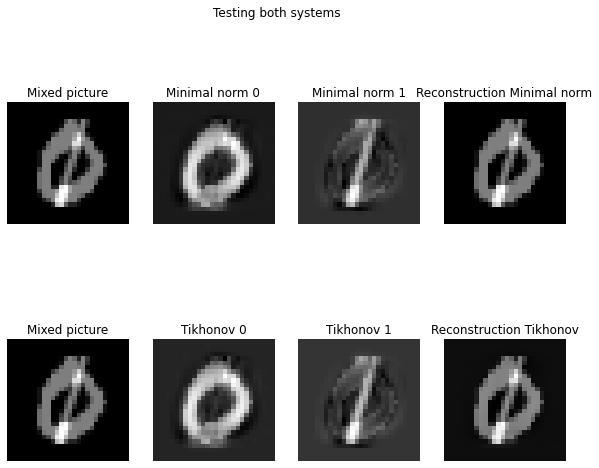

In [28]:
i = 0
mu = 10**(-3)

U, V = Calculate_uv1(100, Mixes)
S, T = Calculate_uv2(mu, 100, Mixes)


fig, ((ax1,ax2,ax3, ax4),(ax5,ax6, ax7, ax8)) = plt.subplots(2,4)
fig.set_figheight(8)
fig.set_figwidth(10)

fig.suptitle("Testing both systems")

ax1.imshow(Mixes[:,i].reshape((28,28)), cmap = 'gray')
ax1.title.set_text('Mixed picture')
ax1.axis('off')

ax2.imshow(U[:,i].reshape((28,28)), cmap = 'gray')
ax2.title.set_text('Minimal norm 0')
ax2.axis('off')

ax3.imshow(V[:,i].reshape((28,28)), cmap = 'gray')
ax3.title.set_text('Minimal norm 1')
ax3.axis('off')

ax4.imshow((U[:,i] + V[:,i]).reshape((28,28)), cmap = 'gray')
ax4.title.set_text('Reconstruction Minimal norm')
ax4.axis('off')

ax5.imshow(Mixes[:,i].reshape((28,28)), cmap = 'gray')
ax5.title.set_text('Mixed picture')
ax5.axis('off')

ax6.imshow(S[:,i].reshape((28,28)), cmap = 'gray')
ax6.title.set_text('Tikhonov 0')
ax6.axis('off')

ax7.imshow(T[:,i].reshape((28,28)), cmap = 'gray')
ax7.title.set_text('Tikhonov 1')
ax7.axis('off')

ax8.imshow((S[:,i]+T[:,i]).reshape((28,28)), cmap = 'gray')
ax8.title.set_text('Reconstruction Tikhonov')
ax8.axis('off')
plt.show()

From a human perspective, one can clearly observe how the projections resemble $0$ and $1$ for both methods. However, i wouldn't say they were perfect. Especially the $1$'s seems to have alot of noise around the top and bottom where the $0$ used to be. This makes somewhat sense as some $1$'s might be somewhat skewed, e.g \ or /. Thus this parts might be in the span of $W_1$ and therefore present in the projection. Other than that I would say they are quite good.

The reconstruction for minimal norm approch is a perfect replica. Now this makes sense as $u + v = y$ is a constraint. $\text{Calculate_uv1()}$ will always find $u,v$ such as their sum is the intial picture. 

However there is no such constraint for $\text{Calculate_uv2()}$, but the reconstruction is still, as far as the human eye can see, identical to the original. This comes from the fact that $\mu$ is choosen very small. As I will show later, this is not the case for larger $\mu$.

Just to give a number og how good the image is seperated we calculate the $B_i$ norm. $\|x\|_{B_i} = x^T B_i x$, which ha is given to be a semi-norm.

below I define the two seminorms using $B_0$ and $B_1$

In [29]:
def B0norm(x):
    I = np.eye(len(W0))
    B0 = I - W0 @ W0.T
    return x.T @ B0 @ x

def B1norm(x):
    I = np.eye(len(W1))
    B1 = I - W1 @ W1.T
    return x.T @ B1 @ x

Now $\|B_ix\|= \|x - W_i W_i^T x\|$. Conveniently $\|x\|^2_{B_i} = \|B_ix\|^2 = x^TB_i x$. The functions in the above cell are effectivly calculating their distance from the composed image to the projection, which we want to minimize.

In [30]:
print("y in B0: ", B0norm(U[:,0] + V[:,0]), " y in B1", B1norm(U[:,0] + V[:,0]) )
print("u in B0: ", B0norm(U[:,0]), " u in B1", B1norm(U[:,0]) )
print("v in B0: ", B0norm( V[:,0]), " v in B1", B1norm( V[:,0]) )

y in B0:  37.004102627582256  y in B1 63.40036690246728
u in B0:  2.520357305170812  u in B1 55.839294682581084
v in B0:  29.443030103322258  v in B1 2.5203576095445905


Now recall that $u$ represents the projection of $y$ onto $Z_0$ and similar for $v$ and $Z_1$. Now these number are quite interesting. First one can observe that $y$ , atleast for the first picture, is originaly closer to a $0$ than a $1$. 

Furthermore, $u$ and $v$ are very small for their respective value, which shows that the algorithm indeed works as intended. 

It is also worth point out that $u$ is quite large in the $B_1$ norm, making $v$ closer to $0$ than $u$ is to $1$. This can be observed as the noise around $1$ forms a $0$.

**Varying for $\mu$**

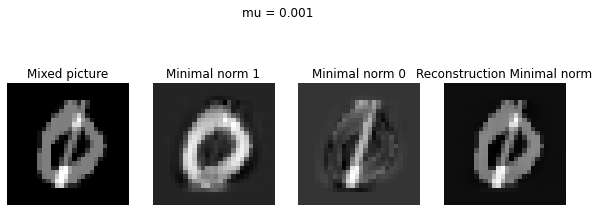

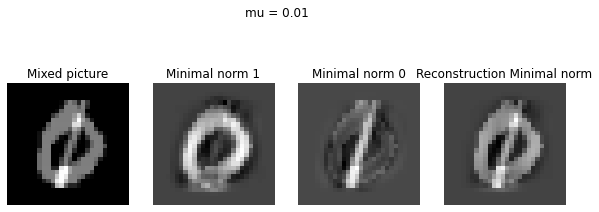

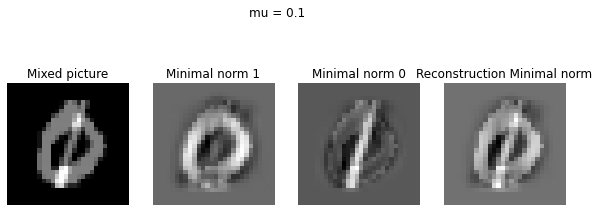

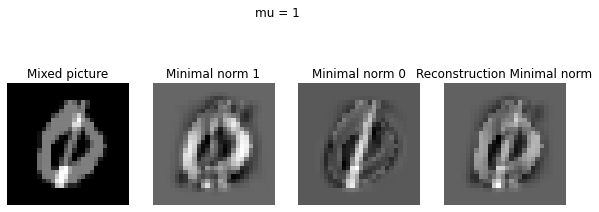

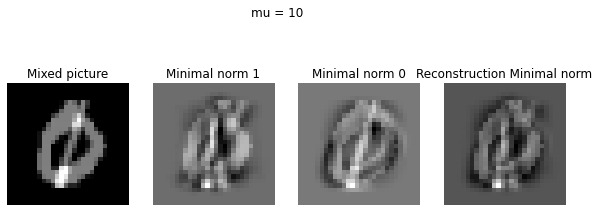

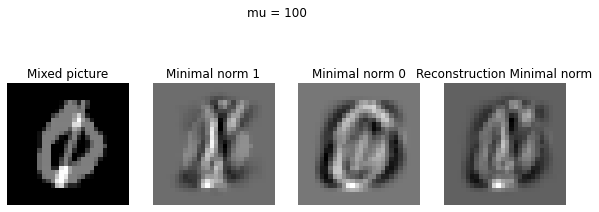

In [31]:
mu = [10**(i) for i in range(-3,3)]

for j in range(len(mu)):
    S, T = Calculate_uv2(mu[j], 100, Mixes)
    fig, ((ax1,ax2,ax3, ax4)) = plt.subplots(1,4)
    fig.set_figheight(4)
    fig.set_figwidth(10)
    fig.suptitle("mu = {}".format(mu[j]))
    
    ax1.imshow(Mixes[:,i].reshape((28,28)), cmap = 'gray')
    ax1.title.set_text('Mixed picture')
    ax1.axis('off')

    ax2.imshow(S[:,i].reshape((28,28)), cmap = 'gray')
    ax2.title.set_text('Minimal norm 1')
    ax2.axis('off')

    ax3.imshow(T[:,i].reshape((28,28)), cmap = 'gray')
    ax3.title.set_text('Minimal norm 0')
    ax3.axis('off')

    ax4.imshow((S[:,i] + T[:,i]).reshape((28,28)), cmap = 'gray')
    ax4.title.set_text('Reconstruction Minimal norm')
    ax4.axis('off')

This plot more or less illustrates the graph showing the precision of the Tikhonov regularisation depening on the $\mu$. For $\mu = 1$ the images for $u,v$ and the reconstruction is quite blurry. The traits are clearly there, but the quality is just bad. It only gets worse for larger $\mu$ and the entire thing is a complete abomination for $\mu = 100$. Which is expected as this correspond perfectly to what we saw in $2d)$. This is the nature of the Tikonovs regularisation. When $\mu$ gets big, a lower value for $\|Bx\|$ is all that matters. I will illustrate that in the block below. 

In [32]:
print("y in B0: ", B0norm(S[:,0] + T[:,0]), " y in B1", B1norm(S[:,0] + T[:,0]))
print("s in B0: ", B0norm(S[:,0]), " u in B1", B1norm(S[:,0]) )
print("t in B0: ", B0norm(T[:,0]), " v in B1", B1norm(T[:,0]) )

y in B0:  0.05355164735034958  y in B1 0.04637430941674144
s in B0:  0.04603398916971001  u in B1 0.00604271916161074
t in B0:  0.0035355125949129364  v in B1 0.03634944044910794


In [33]:
%%timeit -r 5 -n 1
Calculate_uv1(100, Mixes)

139 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [34]:
%%timeit -r 5 -n 1
Calculate_uv2(10**(-3), 100, Mixes)

3.6 s ± 222 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


From these timings we can see that Tikhonov regularisation is way slower for this system. I guess it is somewhat unfair since I am using the $QR$ from the numpy library vs a code I made, but the result would be similar regardless.

I would say that the image seperation was quite successful! We were able to clearly see the $0$ and $1$ when we seperated. Both the minimal norm approach and the Tikhonov regularisation gave nice looking pictures (atleast for an appropriate $\mu$). The images are of course not perfect, but I can definitely understand the interpret the original content. It's hard to say for larger systems but I would say these methods proved quite effective on single channel source separation, alteast for our sizes.